In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
file_path = 'C:/Users/shume/Downloads/CAP_Data/final_dataset.csv'
data = pd.read_csv(file_path)
print(data.info(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252135 entries, 0 to 252134
Columns: 198 entries, SK_ID_CURR to AVG_APPLICATION_AMOUNT
dtypes: float64(141), int64(41), object(16)
memory usage: 380.9+ MB
None    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5  

In [3]:
# Convert categorical variables using one-hot encoding and handle any missing data

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode the categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Handle missing values by filling them with the median of each column
data_filled = data_encoded.fillna(data_encoded.median())

data_filled.head()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,True,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Normalize the range of features, this improves the performance and training stability
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the features, excluding the 'TARGET' column
scaler.fit(data_filled.drop('TARGET', axis=1))

# Transform the features, excluding the 'TARGET' column
Train = scaler.transform(data_filled.drop('TARGET', axis=1))

# It seems there's an error in the original code as it tries to scale the 'TARGET' column along with others.
# Usually, we do not scale the target variable. Here's how you could scale other columns if needed:
# Test = scaler.transform(data_filled.drop('TARGET', axis=1)) # Example line, use when needed

# Combine scaled features with the 'TARGET' column for a complete dataset
data_scaled = pd.DataFrame(Train, columns=data_filled.drop('TARGET', axis=1).columns)
data_scaled['TARGET'] = data_filled['TARGET']

data_scaled.head()


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,TARGET
0,0.000000,0.0,0.001512,0.090287,0.088736,0.077441,0.256321,0.888657,0.964491,0.840893,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.000003,0.0,0.002089,0.311736,0.131689,0.271605,0.045016,0.476258,0.933728,0.948273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000006,0.0,0.000358,0.022472,0.018630,0.023569,0.134897,0.347468,0.987494,0.814201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000011,0.0,0.000935,0.066837,0.108209,0.063973,0.107023,0.349783,0.830384,0.571136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000014,0.0,0.000819,0.116854,0.077664,0.117845,0.392880,0.297442,0.830439,0.811977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


0.9134035338211672


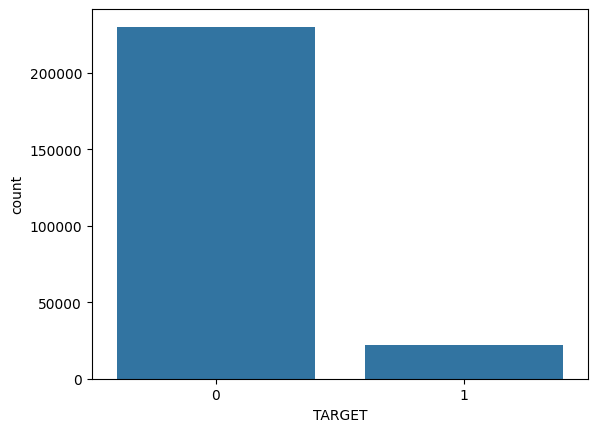

In [9]:
import seaborn as sns
sns.countplot(data=data_scaled,x='TARGET')
print(data_scaled.query('TARGET==0').TARGET.count()/data_scaled.shape[0])

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop(['TARGET'], axis=1), data_scaled['TARGET'], test_size=0.33, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=101)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

# Splitting the data for IV features
X_train_IV, X_test_IV, y_train_IV, y_test_IV = train_test_split(data_scaled.drop(['TARGET'], axis=1), data_scaled['TARGET'], test_size=0.33, random_state=42)

# Applying SMOTE to the training data with IV features
X_train_smote_IV, y_train_smote_IV = smote.fit_resample(X_train_IV, y_train_IV)
X_test_smote_IV, y_test_smote_IV = smote.fit_resample(X_test_IV, y_test_IV)

# Checking the value counts after SMOTE
y_train_smote.value_counts()


TARGET
0    154344
1    154344
Name: count, dtype: int64

In [12]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# Define the Logistic Regression model
Log_model = linear_model.LogisticRegression(C=0.00001, class_weight='balanced')

# Fit the model on the training data
Log_model.fit(X_train, y_train)


LogisticRegression(C=1e-05, class_weight='balanced')

In [13]:
print(f1_score(y_test_smote,Log_model.predict(X_test_smote)))
print(roc_auc_score(y_test_smote, Log_model.predict_proba(X_test_smote)[:, 1]))

0.6662764657980456
0.711009164515812


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier model
rf = RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=100, n_jobs=-1, class_weight='balanced', random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model
print('F1 Score:', f1_score(y_test, rf.predict(X_test)))
print('Recall:', recall_score(y_test, rf.predict(X_test)))
print('Accuracy:', accuracy_score(y_test, rf.predict(X_test)))
print('ROC AUC Score:', roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


F1 Score: 0.2832623736029803
Recall: 0.5874724061810155
Accuracy: 0.7410251787753139
ROC AUC Score: 0.7384776124931379


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[57399, 18558],
       [ 2990,  4258]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score on SMOTE training data
train_smote_accuracy = accuracy_score(y_train_smote, rf.predict(X_train_smote), normalize=True)
print('SMOTE Training Accuracy:', train_smote_accuracy)

# Calculate accuracy score on SMOTE test data
test_smote_accuracy = accuracy_score(y_test_smote, rf.predict(X_test_smote), normalize=True)
print('SMOTE Test Accuracy:', test_smote_accuracy)


SMOTE Training Accuracy: 0.7161502876691028
SMOTE Test Accuracy: 0.6880208539041827


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84     75957
           1       0.19      0.59      0.28      7248

    accuracy                           0.74     83205
   macro avg       0.57      0.67      0.56     83205
weighted avg       0.88      0.74      0.79     83205



In [19]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rf, X_test, y_test, cv=kf)
print('Cross-Validation Mean Score:', cross_val_results.mean())


Cross-Validation Mean Score: 0.7689802295535124


In [31]:

for item in data_scaled.columns:
    if ':' in item:
        item
        
# [],{}": are jason characters and cannot be in column for LGBM model

In [32]:
Train_application_col=data_scaled.drop('TARGET',axis=1).columns
Train_Label=data_scaled['TARGET']
data_scaled=np.array(data_scaled.drop('TARGET',axis=1))
#We convert train_application to np array because jason characters cannot be in data columns for LGBM Model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, Train_Label, test_size=0.33, random_state=42)

In [35]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(class_weight='balanced',n_estimators=1000,random_state=42,learning_rate=0.05,
                         objective='binary',reg_alpha=0.1,reg_lambda=0.1,subsample=0.8)
clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 14586, number of negative: 154344
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.244791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29075
[LightGBM] [Info] Number of data points in the train set: 168930, number of used features: 291
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=1000,
               objective='binary', random_state=42, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)

In [36]:
print(f1_score(y_test,clf.predict(X_test)))
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print('Recall:',recall_score(y_test,clf.predict(X_test)),' Accuracy:',accuracy_score(y_train, clf.predict(X_train), normalize=True))

0.31324673391148994
0.7677973339074935
Recall: 0.5805739514348786  Accuracy: 0.8262238797134908


In [37]:
confusion_matrix(y_test, clf.predict(X_test))

array([[60546, 15411],
       [ 3040,  4208]], dtype=int64)

In [38]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     75957
           1       0.21      0.58      0.31      7248

    accuracy                           0.78     83205
   macro avg       0.58      0.69      0.59     83205
weighted avg       0.89      0.78      0.82     83205

